In [1]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from jupyter_dash import JupyterDash

import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

df_holi = pd.read_csv('holidays_events.csv')
df_oil = pd.read_csv('oil.csv')
df_stores = pd.read_csv('stores.csv')
df_trans = pd.read_csv('transactions.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


stores_num = df_stores.shape[0]
type_store_num = len(df_stores.groupby('type').size())
product_num = len(df_train.groupby('family').size())
cities_num = len(df_stores.groupby('city').size())
state_num = len(df_stores.groupby('state').size())

#df_train['date'] = pd.to_datetime(df_train['date'])
df_train.sort_values(by=['date'], inplace=True, ascending = True)
first_date=(df_train["date"].iloc[0])#.strftime("%Y-%m-%d")
last_date=(df_train["date"].iloc[-1])#.strftime("%Y-%m-%d")

fig0=go.Figure()
fig0.add_trace(go.Scatter(
    x=[0,1,2,3.2,4.5,5.5],
    y=[1.7, 1.7, 1.7, 1.7, 1.7, 1.7],
    mode="text",
    text=["Mağaza","Şehir","Eyalet","Mağaza Tipi", "Ürün Ailesi", "Küme"],
    textposition="bottom center"
))
fig0.add_trace(go.Scatter(
    x=[0,1,2,3.2,4.5,5.5],
    y=[1.1, 1.1, 1.1, 1.1, 1.1, 1.1],
    mode="text", 
    text=["<span style='font-size:24px'><b>"+ str(stores_num) +"</b></span>", 
          "<span style='font-size:24px'><b>"+ str(cities_num) +"</b></span>",
          "<span style='font-size:24px'><b>"+ str(state_num) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(type_store_num) + "</b></span>",
          "<span style='font-size:24px'><b>"+ str(product_num) + "</b></span>",
          "<span style='font-size:24px'><b>17</b></span>"],
    textposition="bottom center"
))
fig0.add_hline(y=2.2, line_width=5, line_color='orange')
fig0.add_hline(y=0.3, line_width=3, line_color='orange')
fig0.add_trace(go.Scatter(
    x=[2.5],
    y=[-0.2],
    mode="text",
    text=["<span style='font-size:18px'><b>         Veri tarih aralığı " + first_date + " ile " + last_date + " arasındadır."+"</b></span>"],
    textposition="bottom center"
))


fig0.update_yaxes(visible=False)
fig0.update_xaxes(visible=False)
fig0.update_layout(showlegend=False, height=300, width=800, 
                  title='Mağazaların Satış Özeti', title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,6.6], yaxis_range=[-1.2,2.2],
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  font=dict(size=20, color='#323232'),
                  title_font=dict(size=28, color='#222'),
                  margin=dict(t=90,l=70,b=0,r=70), 
    )


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
colors={}
def colorFader(c1,c2,mix=0): 
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
c1='#FAA831' 
c2='#9A4800' 
n=9
for x in range(n+1):
    colors['level'+ str(n-x+1)] = colorFader(c1,c2,x/n) 
colors['background'] = '#232425'
colors['text'] = '#fff'

In [3]:
colors

{'level10': '#faa831',
 'level9': '#ef9d2c',
 'level8': '#e59326',
 'level7': '#da8821',
 'level6': '#cf7d1b',
 'level5': '#c57316',
 'level4': '#ba6810',
 'level3': '#af5d0b',
 'level2': '#a55305',
 'level1': '#9a4800',
 'background': '#232425',
 'text': '#fff'}

In [4]:
# copying of train data and merging other data
df_train1 = df_train.merge(df_holi, on = 'date', how='left')
df_train1 = df_train1.merge(df_oil, on = 'date', how='left')
df_train1 = df_train1.merge(df_stores, on = 'store_nbr', how='left')
df_train1 = df_train1.merge(df_trans, on = ['date', 'store_nbr'], how='left')
df_train1 = df_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

df_train1['date'] = pd.to_datetime(df_train1['date'])
df_train1['year'] = df_train1['date'].dt.year
df_train1['month'] = df_train1['date'].dt.month
df_train1['week'] = df_train1['date'].dt.isocalendar().week
df_train1['quarter'] = df_train1['date'].dt.quarter
df_train1['day_of_week'] = df_train1['date'].dt.day_name()
df_train1.sample(n=4)

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
2364759,2323151,2016-07-30,42,HOME APPLIANCES,0.000,0.0,NaN,NaN,NaN,NaN,...,Cuenca,Azuay,D,2,1219.0,2016,7,30,3,Saturday
1832041,1808277,2015-10-14,46,DELI,522.731,65.0,NaN,NaN,NaN,NaN,...,Quito,Pichincha,A,14,2695.0,2015,10,42,4,Wednesday
2277802,2242767,2016-06-15,37,LINGERIE,0.000,0.0,NaN,NaN,NaN,NaN,...,Cuenca,Azuay,D,2,1407.0,2016,6,24,2,Wednesday
1935733,1911964,2015-12-11,6,EGGS,125.000,29.0,NaN,NaN,NaN,NaN,...,Quito,Pichincha,D,13,1793.0,2015,12,50,4,Friday


In [5]:
df_fa_sa = df_train1.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_fa_sa['color'] = colors['level10']
df_fa_sa['color'][:1] = colors['level1']
df_fa_sa['color'][1:2] = colors['level2']
df_fa_sa['color'][2:3] = colors['level3']
df_fa_sa['color'][3:4] = colors['level4']
df_fa_sa['color'][4:5] = colors['level5']

fig1 = go.Figure(data=[go.Bar(x=df_fa_sa['sales'],
                             y=df_fa_sa['family'], 
                             marker=dict(color= df_fa_sa['color']),
                             name='Family', orientation='h',
                             text=df_fa_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Ürün Ailesi</b>:'+ df_fa_sa['family'] +'<br>' +
                            '<b>Satış Adedi</b>:'+ df_fa_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig1.update_layout(title_text='En Çok Satılan 10 Ürün Ailesi',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig1.update_yaxes(showgrid=False, categoryorder='total ascending')



In [6]:
df_st_sa = df_train1.groupby('store_type').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
fig2=go.Figure(data=[go.Pie(values=df_st_sa['sales'], labels=df_st_sa['store_type'], name='Store type',
                     marker=dict(colors=[colors['level1'],colors['level3'],colors['level5'],colors['level7'],colors['level9']]), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'
                    )])
fig2.update_layout(title_text='Ortalama Satışlar ve Mağaza Türlerinin Karşılaştırılması',paper_bgcolor="#000000",plot_bgcolor='#1f2c56',
                font=dict(
                size=14,
                color='white'))
fig2.update_yaxes(showgrid=False, categoryorder='total ascending')

In [7]:
df_cl_sa = df_train1.groupby('cluster').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_cl_sa['color'] = colors['level10']
df_cl_sa['color'][:1] = colors['level1']
df_cl_sa['color'][1:2] = colors['level2']
df_cl_sa['color'][2:3] = colors['level3']
df_cl_sa['color'][3:4] = colors['level4']
df_cl_sa['color'][4:5] = colors['level5']
fig3 = go.Figure(data=[go.Bar(y=df_cl_sa['sales'],
                             x=df_cl_sa['cluster'], 
                             marker=dict(color= df_cl_sa['color']),
                             name='Cluster',
                             text=df_cl_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Küme</b>:'+ df_cl_sa['cluster'].astype(str) +'<br>' +
                            '<b>Satış Adedi</b>:'+ df_cl_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig3.update_layout(title_text='Kümelerine Göre Satış Adetleri',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig3.update_xaxes(tickmode = 'array', tickvals=df_cl_sa.cluster)
fig3.update_yaxes(showgrid=False)

In [8]:
df_city_sa = df_train1.groupby('city').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_city_sa['color'] = colors['level10']
df_city_sa['color'][:1] = colors['level1']
df_city_sa['color'][1:2] = colors['level2']
df_city_sa['color'][2:3] = colors['level3']
df_city_sa['color'][3:4] = colors['level4']
df_city_sa['color'][4:5] = colors['level5']

fig4 = go.Figure(data=[go.Bar(y=df_city_sa['sales'],
                             x=df_city_sa['city'], 
                             marker=dict(color= df_city_sa['color']),
                             name='State',
                             text=df_city_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Şehir</b>:'+ df_city_sa['city'] +'<br>' +
                            '<b>Satış Adedi</b>:'+ df_city_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig4.update_layout(title_text='Şehir Bazlı Ortalama Satış Adedi',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig4.update_yaxes(showgrid=False, categoryorder='total ascending')

In [9]:
df_state_sa = df_train1.groupby('state').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_state_sa['color'] = colors['level10']
df_state_sa['color'][:1] = colors['level1']
df_state_sa['color'][1:2] = colors['level2']
df_state_sa['color'][2:3] = colors['level3']
df_state_sa['color'][3:4] = colors['level4']
df_state_sa['color'][4:5] = colors['level5']
df_state_sa
fig5 = go.Figure(data=[go.Bar(y=df_state_sa['sales'],
                             x=df_state_sa['state'], 
                             marker=dict(color= df_state_sa['color']),
                             name='State',
                             text=df_state_sa['sales'].astype(int),
                             textposition='auto',
                             hoverinfo='text',
                             hovertext=
                            '<b>Eyalet</b>:'+ df_state_sa['state'] +'<br>' +
                            '<b>Satış Adedi</b>:'+ df_state_sa['sales'].astype(int).astype(str) +'<br>' ,
                            # hovertemplate='Family: %{y}'+'<br>Sales: $%{x:.0f}'
                            )])
fig5.update_layout(title_text='Eyalet Bazlı Ortalama Satış Adedi',paper_bgcolor=colors['background'],plot_bgcolor=colors['background'],
                font=dict(
                size=14,
                color='white'))

fig5.update_yaxes(showgrid=False, categoryorder='total ascending')

In [10]:
df_day_sa = df_train1.groupby('date').agg({"sales" : "mean"}).reset_index()
fig6 = go.Figure(data=[go.Scatter(x=df_day_sa['date'], y=df_day_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'                                 )])
fig6.update_layout(title_text='Günlük Ortalama Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig6.update_xaxes(showgrid=False)
fig6.update_yaxes(showgrid=False)

In [11]:
df_w_sa = df_train1.groupby('week').agg({"sales" : "mean"}).reset_index()
fig7 = go.Figure(data=[go.Scatter(x=df_w_sa['week'], y=df_w_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig7.update_layout(title_text='Ortalama Haftalık Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig7.update_yaxes(showgrid=False)
fig7.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_w_sa.week, ticktext=[i for i in range(1,52)])

In [12]:
df_mon_sa = df_train1.groupby('month').agg({"sales" : "mean"}).reset_index()
fig8 = go.Figure(data=[go.Scatter(x=df_mon_sa['month'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig8.update_layout(title_text='Aylık Ortalama Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig8.update_yaxes(showgrid=False)
fig8.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_mon_sa.month)

In [13]:
df_qu_sa = df_train1.groupby('quarter').agg({"sales" : "mean"}).reset_index()
fig9 = go.Figure(data=[go.Scatter(x=df_qu_sa['quarter'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig9.update_layout(title_text='Ortalama 3 Aylık Satış Adetleri (Quarter)',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig9.update_yaxes(showgrid=False)
fig9.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_qu_sa.quarter)

In [14]:
df_y_sa = df_train1.groupby('year').agg({"sales" : "mean"}).reset_index()
fig10= go.Figure(data=[go.Scatter(x=df_y_sa['year'], y=df_y_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig10.update_layout(title_text='Ortalama Yıllık Satış Adetleri',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig10.update_yaxes(showgrid=False)
fig10.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_y_sa.year)

In [15]:
df_c_s_sa = df_train1.groupby(['state','city']).agg({"sales" : "mean"}).reset_index()
fig11 = px.sunburst(df_c_s_sa, path=['state', 'city' ], 
                    values='sales',color='sales',
                    color_continuous_scale=[colors['level1'], colors['level10']])

fig11.update_layout(title_text='Eyaletler & Şehirleri',width = 700,paper_bgcolor='#232425',plot_bgcolor='#232425',font=dict(color=colors['text']))
fig11.show()

In [16]:
import xgboost as xg

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

oil_df = pd.read_csv("oil.csv")
holidays_df = pd.read_csv("holidays_events.csv")
stores_df = pd.read_csv("stores.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
transactions_df = pd.read_csv("transactions.csv")

In [18]:
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [19]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [20]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [21]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [22]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [23]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [24]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [25]:
train_df['date'] = pd.to_datetime(train_df['date'],  errors='coerce')

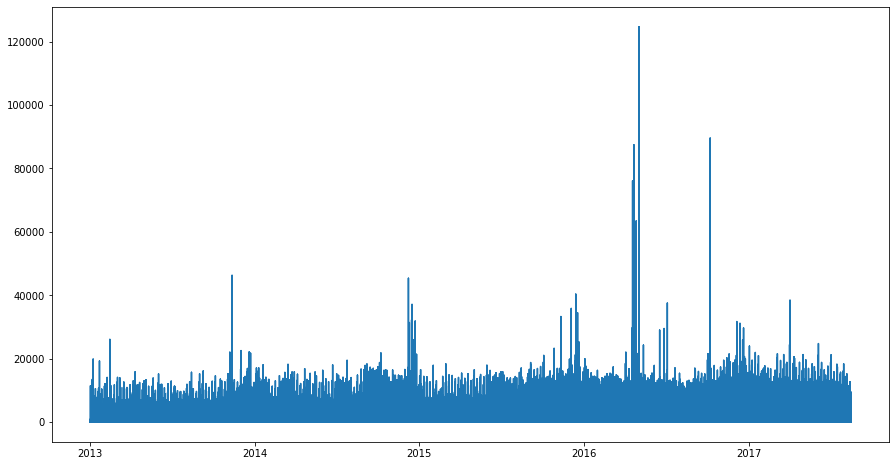

In [26]:
plt.figure(figsize=(15,8))
plt.plot(train_df.date, train_df.sales)
plt.show()

In [27]:
months_sales = train_df.groupby(train_df['date'].dt.strftime('%B'))['sales'].sum().sort_values()

In [28]:
months_pormotions = train_df.groupby(train_df['date'].dt.strftime('%B'))['onpromotion'].sum().sort_values()

In [29]:
stores_sales = train_df.groupby('store_nbr')['sales'].sum()

In [30]:
stores_sales.sort_values(inplace=True)

In [31]:
round(stores_sales, 2)

store_nbr
52     2696169.73
22     4090201.74
32     5951796.00
30     7382073.66
35     7676679.42
26     7755121.89
42     8945767.89
21     9255505.91
10     9613905.74
29     9725157.70
13    10523045.82
12    10659217.96
16    10986412.55
54    11057483.12
53    11216167.28
14    11387918.75
25    11420997.87
15    11451270.02
23    11651380.67
20    12920954.59
19    13049509.84
18    13259375.69
1     14145012.87
33    14178501.29
41    14991039.14
36    15322431.10
5     15592404.57
43    16391692.21
34    17090734.16
31    17746872.70
17    18030969.25
28    18383154.83
40    18395757.41
38    18859999.26
4     18909700.38
27    19188021.38
37    19970635.61
39    20252192.53
2     21557388.64
24    23767732.70
6     25183680.00
9     26409441.06
7     26952049.58
11    28325558.48
50    28653020.62
8     30494286.93
51    32911489.54
48    35933130.27
46    41896062.12
49    43420095.78
3     50481910.19
47    50948310.06
45    54498010.42
44    62087553.25
Name: sales, dtype

In [32]:
train_df.date = pd.to_numeric(train_df.date)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
train_df.family = le.fit_transform(train_df.family)

In [35]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,1356998400000000000,1,0,0.0,0.0
1,1,1356998400000000000,1,1,0.0,0.0


In [36]:
X = train_df.drop(['sales', 'id', 'date'], axis = 1).values
y = train_df.sales.values

In [37]:
X.shape

(3000888, 3)

In [38]:
y.shape

(3000888,)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [40]:
regressor = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, random_state=42)

In [41]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=12, random_state=42)

In [42]:
regressor.score(X_train, y_train)

0.663494706816192

In [43]:
regressor.score(X_test, y_test)

0.6563814090619251

In [44]:
test_df.head(20)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0
5,3000893,2017-08-16,1,BREAD/BAKERY,131.0
6,3000894,2017-08-16,1,CELEBRATION,29.0
7,3000895,2017-08-16,1,CLEANING,438.0
8,3000896,2017-08-16,1,DAIRY,226.0
9,3000897,2017-08-16,1,DELI,90.0


In [45]:
test_df.family = le.fit_transform(test_df.family)

In [46]:
test_df.head(20)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,0,20.0
1,3000889,2017-08-16,1,1,1.0
2,3000890,2017-08-16,1,2,8.0
3,3000891,2017-08-16,1,3,560.0
4,3000892,2017-08-16,1,4,1.0
5,3000893,2017-08-16,1,5,131.0
6,3000894,2017-08-16,1,6,29.0
7,3000895,2017-08-16,1,7,438.0
8,3000896,2017-08-16,1,8,226.0
9,3000897,2017-08-16,1,9,90.0


In [47]:
X = test_df.drop(["id", "date"], axis=1).values
X.shape

(28512, 3)

In [48]:
X[0]


array([ 1.,  0., 20.])

In [49]:
predictions = regressor.predict(X)

In [50]:
test_df['sales'] = predictions

In [51]:
test_df.head(28512)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,101.266370
1,3000889,2017-08-16,1,1,1.0,101.266370
2,3000890,2017-08-16,1,2,8.0,101.266370
3,3000891,2017-08-16,1,3,560.0,9384.554231
4,3000892,2017-08-16,1,4,1.0,101.266370
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,54.0,378.102689
28508,3029396,2017-08-31,9,29,10.0,101.266370
28509,3029397,2017-08-31,9,30,302.0,2900.078084
28510,3029398,2017-08-31,9,31,15.0,101.266370


In [52]:
test_df.to_csv('DecisionTreeSubmission.csv', index=False)
print("submission successed")

submission successed


In [53]:
import xgboost as xg

In [54]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123, max_depth=10)

In [55]:
xgb_r.fit(X_train, y_train)

[00:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [56]:
xgb_r.score(X_test, y_test)

0.8867356645038273

In [57]:
xgb_r.score(X_train, y_train)

0.8967767660521007

In [58]:
test_df.family = le.fit_transform(test_df.family)

In [59]:
test_df.head(20)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,101.266370
1,3000889,2017-08-16,1,1,1.0,101.266370
2,3000890,2017-08-16,1,2,8.0,101.266370
3,3000891,2017-08-16,1,3,560.0,9384.554231
4,3000892,2017-08-16,1,4,1.0,101.266370
5,3000893,2017-08-16,1,5,131.0,940.080276
6,3000894,2017-08-16,1,6,29.0,378.102689
7,3000895,2017-08-16,1,7,438.0,2900.078084
8,3000896,2017-08-16,1,8,226.0,1617.399146
9,3000897,2017-08-16,1,9,90.0,940.080276


In [60]:
X = test_df.drop(["id", "date"], axis=1).values
X.shape

(28512, 4)

In [61]:
X[0]

array([  1.        ,   0.        ,  20.        , 101.26637027])

In [62]:
test_df['sales'] = predictions

In [63]:
test_df.head(200)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,0,20.0,101.266370
1,3000889,2017-08-16,1,1,1.0,101.266370
2,3000890,2017-08-16,1,2,8.0,101.266370
3,3000891,2017-08-16,1,3,560.0,9384.554231
4,3000892,2017-08-16,1,4,1.0,101.266370
...,...,...,...,...,...,...
195,3001083,2017-08-16,14,30,302.0,2900.078084
196,3001084,2017-08-16,14,31,15.0,101.266370
197,3001085,2017-08-16,14,32,8.0,101.266370
198,3001086,2017-08-16,15,0,20.0,101.266370


In [64]:
test_df.to_csv('XGBOOSTsubmission.csv', index=False)
print("submission successed")

submission successed


In [65]:
df_mon_sa = test_df.groupby('family').agg({"sales" : "mean"}).reset_index()
fig12 = go.Figure(data=[go.Scatter(x=df_mon_sa['family'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig12.update_layout(title_text='XGBOOST Algoritmasına göre -Ürün Kategorisine Göre Ortalama Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig12.update_yaxes(showgrid=False)
fig12.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_mon_sa.family)

In [66]:
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['week'] = test_df['date'].dt.isocalendar().week
test_df['quarter'] = test_df['date'].dt.quarter
test_df['day_of_week'] = test_df['date'].dt.day_name()
test_df['day'] = test_df['date'].dt.day_name()

In [67]:
df_mon_sa = test_df.groupby('week').agg({"sales" : "sum"}).reset_index()
fig13 = go.Figure(data=[go.Scatter(x=df_mon_sa['week'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig13.update_layout(title_text='XGBOOST Algoritmasına göre -Hafta bazlı Toplam Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig13.update_yaxes(showgrid=False)
fig13.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_mon_sa.week)

In [68]:
df_mon_sa = test_df.groupby('day').agg({"sales" : "sum"}).reset_index()
fig14 = go.Figure(data=[go.Scatter(x=df_mon_sa['day'], y=df_mon_sa['sales'], fill='tozeroy', fillcolor='#FAA831', line_color='#bA6800'
                                  ,mode='lines+markers')])


fig14.update_layout(title_text='XGBOOST Algoritmasına göre - Gün bazlı Toplam Satış Adedi',height=300,paper_bgcolor='#232425',plot_bgcolor='#232425',
                font=dict(
                size=12,
                color='white'))
fig14.update_yaxes(showgrid=False)
fig14.update_xaxes(showgrid=False,tickmode = 'array', tickvals=df_mon_sa.day)

In [72]:
app = dash.Dash()

app.layout = html.Div(
    
      [html.H1('FAVORITA MAĞAZA - SATIŞ TAHMİNLEME & İSTATİSTİKSEL VERİ ANALİZİ- DASBOARD',   ### page header
        style={'textAlign': 'center', 'margin-bottom': 0.3}),
    
    html.Div([ dcc.Graph(id='graph1',figure=fig0, style={'textAlign': 'center', 'margin-bottom': 0.3}),
              
                      
                      dcc.Graph(id='graph2',figure=fig1) 
                       ,
                      
                     
                       dcc.Graph(id='graph3',figure=fig2) ,

                        dcc.Graph(id='graph4',figure=fig3) ,
                    
                       dcc.Graph(id='graph5',figure=fig4) ,

                      dcc.Graph(id='graph6',figure=fig5) ,
                     dcc.Graph(id='graph7',figure=fig6) ,

                     dcc.Graph(id='graph8',figure=fig7) ,
                     dcc.Graph(id='graph9',figure=fig8) ,
                     dcc.Graph(id='graph10',figure=fig9) ,
                     dcc.Graph(id='graph11',figure=fig10) ,
                     dcc.Graph(id='graph12',figure=fig11) ,
                        dcc.Graph(id='graph13',figure=fig12),
                                  dcc.Graph(id='graph14',figure=fig13)
                                  ,
                                  dcc.Graph(id='graph15',figure=fig14)
                           ], style= {'width': '75%', 'display': 'inline-block', 'textAlign':'center'

})

                       
                       
                       
                       
                      ])

In [ ]:
if __name__ == "__main__":
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Jan/2022 00:03:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 00:03:42] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 00:03:42] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 00:03:42] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Jan/2022 00:03:42] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Jan/2022 01:13:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 01:13:13] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 01:13:13] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Jan/2022 01:13:13] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [16/Jan/2022 01:13:13] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
